<a href="https://colab.research.google.com/github/GopMajak/Stroke-prediction-with-varying-deep-learning-models-Description/blob/main/Stroke_Prediction_with_Varying_Deep_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stroke prediction with varying deep learning models Description**

This project explores the application of multiple deep learning models to predict the likelihood of stroke occurrence based on patient data. The objective is to identify the most effective model for stroke risk prediction, enhancing early detection and preventive care.





**Tasks:**

*   Developed and implemented deep learning models models for stroke prediction, applying advanced machine learning algorithms to analyze patient data.
*   Performed data pre-processing, feature engineering, and dimensionality reduction to enhance model accuracy and computational efficiency.
*   Conducted hyper-parameter tuning and model evaluation using cross-validation techniques to optimize performance metrics, such as accuracy, precision, and recall, ensuring robust and reliable stroke prediction outcomes.

**Results of Stroke Prediction with Varying Deep Learning Models:**

The performance of three classifiers—KNN, Random Forest, and XGBooster—was evaluated under baseline and hypertuned conditions for stroke prediction. The results reveal varying strengths and highlight the impact of hyperparameter tuning on model performance.

Baseline Performance:

Training Accuracy:

KNN Classifier: 96%

Random Forest Classifier: 100% (indicating slight overfitting)

XGBooster: 96%

Testing Accuracy:

KNN Classifier: 94%

Random Forest Classifier: 94%

XGBooster: 96%

Hypertuned Performance:

Training Accuracy: All models achieved 96%, showing improved balance and addressing overfitting in the Random Forest Classifier.

Insights:

XGBooster: Provided slightly better accuracy in baseline testing, demonstrating its robustness in handling complex datasets.
Random Forest Classifier: Initially exhibited overfitting with 100% training accuracy, but hyperparameter tuning improved its generalization, achieving consistent results across training and testing datasets.
KNN Classifier: Performance remained unchanged after hypertuning, indicating a potential ceiling in its predictive capabilities with the given data.

Conclusion:
XGBooster emerged as the most effective model for this stroke prediction task, offering a slight edge in baseline accuracy. Random Forest and KNN provided competitive performance but required different levels of tuning to address limitations. This comparative analysis underscores the importance of model selection and optimization in achieving reliable predictive outcomes in healthcare applications.

##Data Dictionary

Column Name | Data Type | Description
------------|-----------|------------
id | Integer | Unique identifier
gender | Object | "Male", "Female", "Other"
age | Float | Age of patient
hypertension |Integer | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
heart Disease | Integer | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
ever_married | Object | "No" or "Yes"
work_type | Object |  "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
Residence_type | Object | "Rural" or "Urban"
avg_glucose_level | Float | average glucose level in blood
bmi | Float | body mass index
smoking_status | Object | "formerly smoked", "never smoked", "smokes" or "Unknown"*
stroke | Integer | 1 if the patient had a stroke or 0 if not, target

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

##Load Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load the dataset

In [ ]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/02 Supervised Machine Learning/03 Week 3: Classification Models/Assignment Exercise/Project Part 2/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Inspect Data/Clean Up Data

###Explore the data

In [ ]:
#Explore the data (dtypes, number of rows, number of columns, and null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset matches the dictionary. bmi has missing values.

In [ ]:
#Checking statistical analysis for any irregularities
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Although the min of age looks suspiciously low, this dataset has patients as young as 8 days old.

In [ ]:
#Determining if there are any duplicates
df.duplicated().any()

False

There are no duplicates in this data.

In [ ]:
#ensure column labels have no errors

#instantiate the datatypes
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
print(str_cols)

num_cols = data_types[data_types=='float64'].index
print(f'\n{num_cols}')

int_cols = data_types[data_types=='int64'].index
print(f'\n{int_cols}\n')

#explore each univariate distribution object in a loop
for col in str_cols:
  print(f'-{col}:')
  print(df[col].value_counts())
  print('\n\n')

#explore each univariate distribution float64 in a loop
for ncol in num_cols:
  print(f'--{ncol}:')
  print(df[ncol].value_counts())
  print('\n\n')

#explore each univariate distribution int64 in a loop
for intcol in int_cols:
  print(f'--{intcol}:')
  print(df[intcol].value_counts())
  print('\n\n')

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

Index(['id', 'hypertension', 'heart_disease', 'stroke'], dtype='object')

-gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



-ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64



-work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



-Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64



-smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



--age:
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64



--avg_glucose_l

There is only 1 other in gender. This can be dropped.

Residence_type is the only column with a capital letter. I will make sure this matches the lowercase pattern of the other columns

id column contains unique values and does not pertain to the data. This column can be dropped.

In [ ]:
#determining where in the data is 'Other'
df.loc[df['gender']== 'Other']

#dropping single Gender == Other in the data
df = df.drop(index=3116)

#ensure it was dropped
df.loc[df['gender']== 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
#convert columns to lowercase
df.columns = df.columns.str.lower()

#ensure it worked
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#drop id column as it does not pertain to the predictive data
df = df.drop(columns = 'id')

#ensure the code worked
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

###Explore Data Summary

* bmi has missing values. These values will be replaced with the median using SimpleImputer once we reach preprocessing for machine learning

* 'Other' in gender was dropped.

* to facilitate data, ensured all columns were lowercased, since Residence type was the only one uppercased.

##Exploratory Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28457c8810>,
      dtype=object)

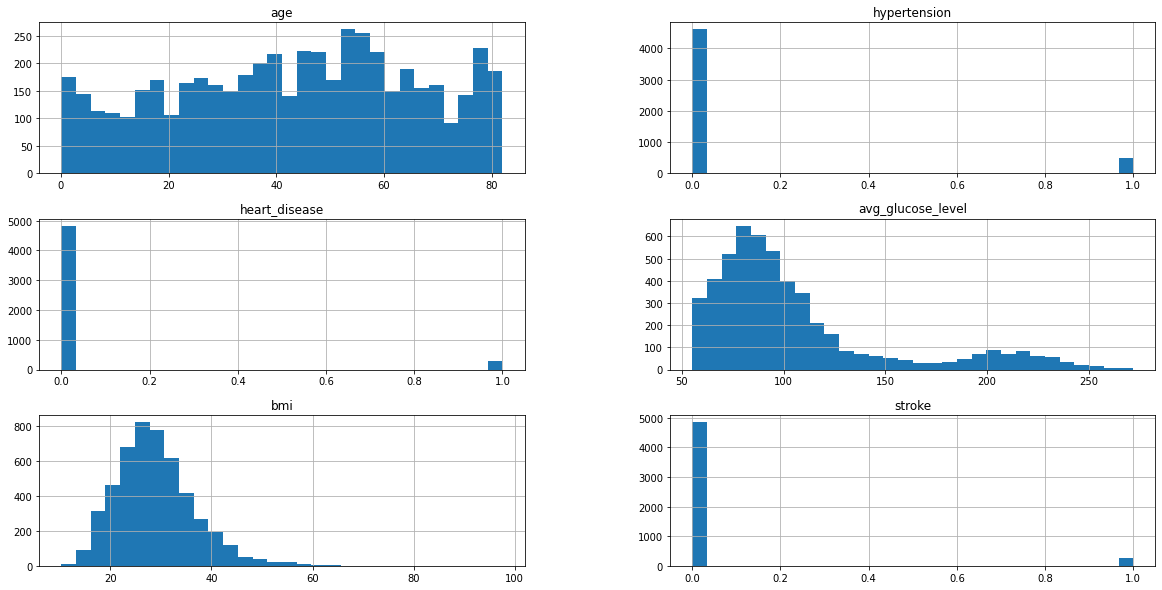

In [ ]:
#histogram of numerical data
df.hist(bins=30, figsize=(20,10))

* age is evenly distributed
* avg_glucose_level and bmi are skewed to the right, showing a positive distribution.

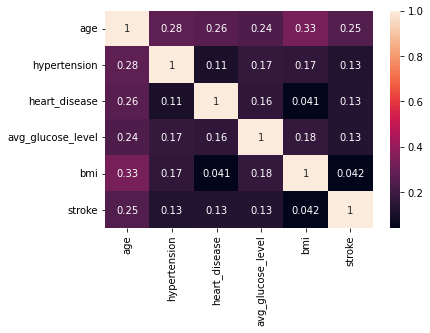

In [ ]:
#Explore the relationships between variables and bivariate
sns.heatmap(df.corr(), annot=True);

* Age has correlations to bmi, hypertension, heart_disease, avg_gluclose_level, and stroke
* All categories have a positive correlation to each other (no negatives)

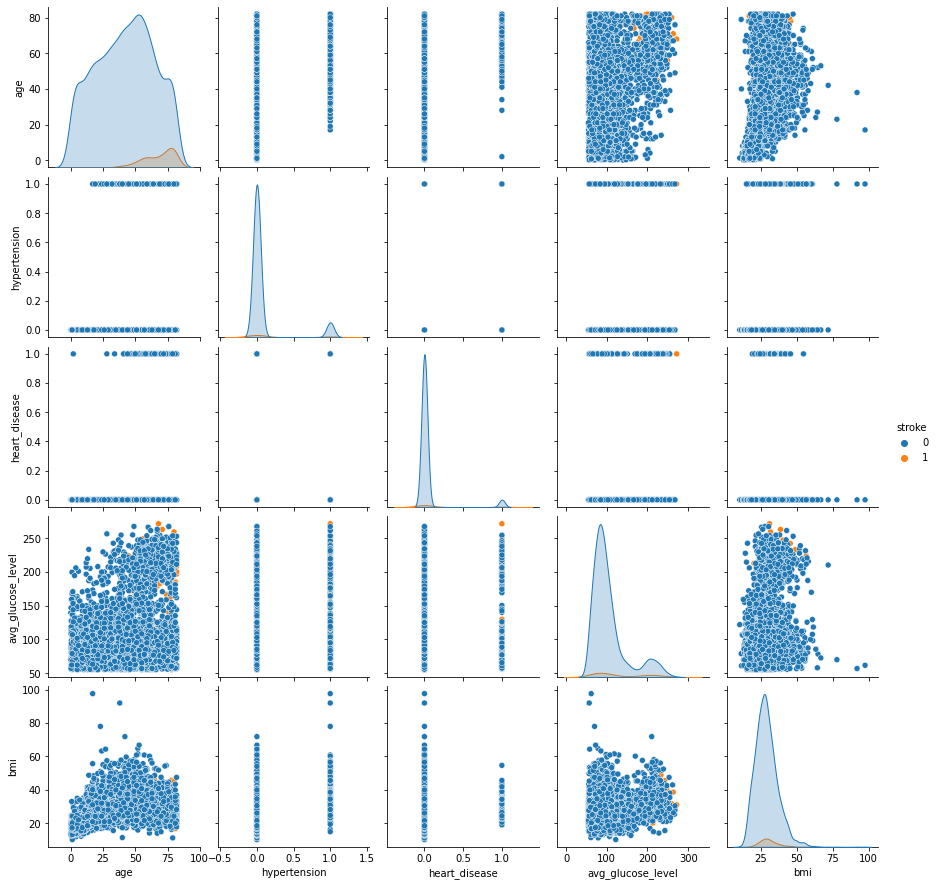

In [ ]:
#Explore the best set of features to explain relationship between two variables
sns.pairplot(df, hue='stroke')

* Based on the chart above we can see that the data is highly unbalanced.

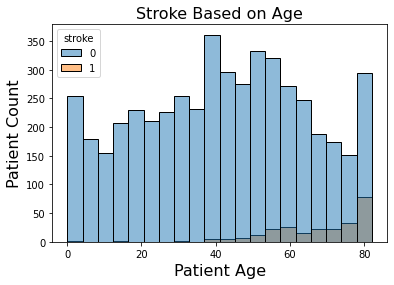

In [ ]:
sns.histplot(data=df, x='age', hue='stroke')
plt.title('Stroke Based on Age', fontsize=16)
plt.xlabel('Patient Age', fontsize=16)
plt.ylabel('Patient Count', fontsize=16);

* Chances of stroke increase as you age, but people, according to this data, generally do not have strokes.

###Summary of Exploratory Data

* Age is evenly distributed
* avg_glucose_level and bmi are skewed to the left
* Age has correlations to bmi, hypertension, heart_disease, avg_gluclose_level, and stroke
* All categories have a positive correlation to each other (no negatives)
* Data is highly unbalanced
* Changes of stroke increase as you age, but people, according to this data, generally do not have strokes.

##Explanatory Visualization

###How many strokes are there based on age?

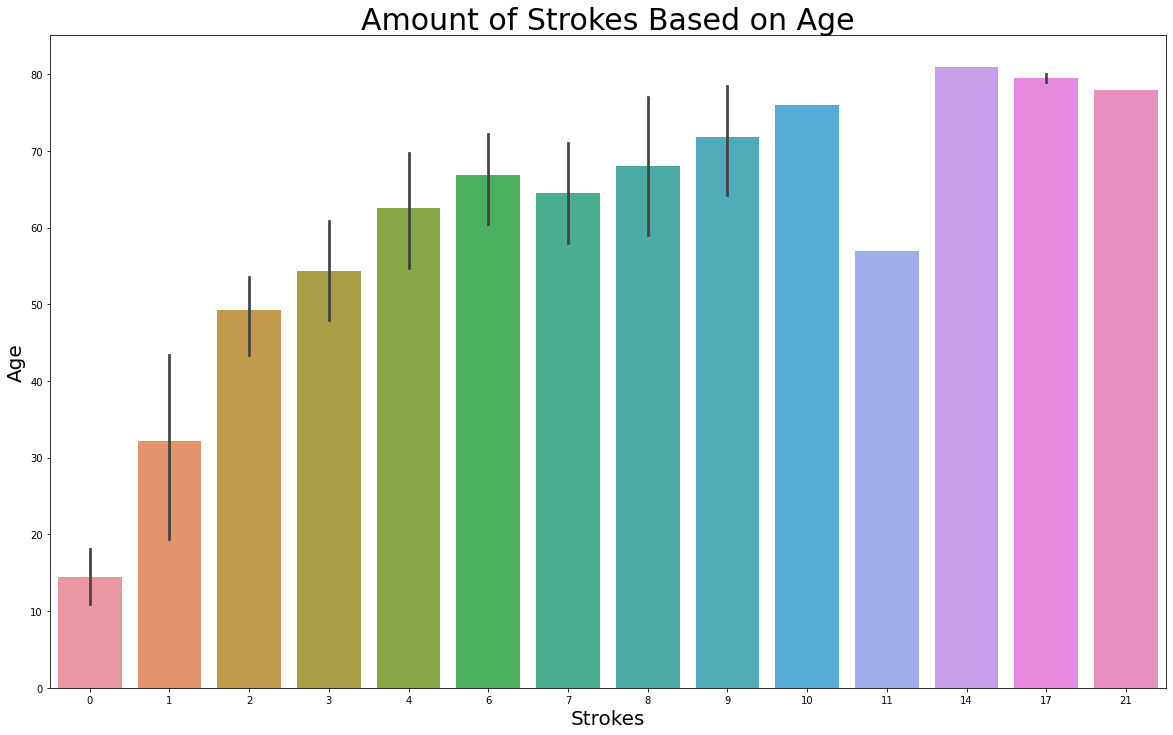

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
health = df.groupby('age')['stroke'].sum().sort_values(ascending=False)
sns.barplot(y=health.index, x=health)
plt.xlabel('Strokes', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.title('Amount of Strokes Based on Age', fontsize=30);

The graph above tells us that the amount of strokes increase by age, with 80 year olds, so far, reporting a stroke.

###Does bmi affect if one has a stroke?

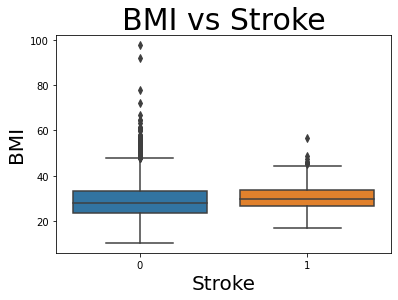

In [ ]:
sns.boxplot(data = df, x=df.stroke, y=df.bmi)
plt.title('BMI vs Stroke', fontsize=30)
plt.xlabel('Stroke', fontsize=20)
plt.ylabel('BMI', fontsize=20);

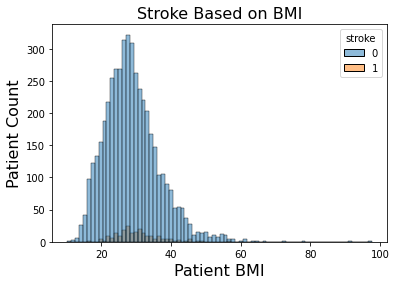

In [ ]:
sns.histplot(data=df, x='bmi', hue='stroke')
plt.title('Stroke Based on BMI', fontsize=16)
plt.xlabel('Patient BMI', fontsize=16)
plt.ylabel('Patient Count', fontsize=16);

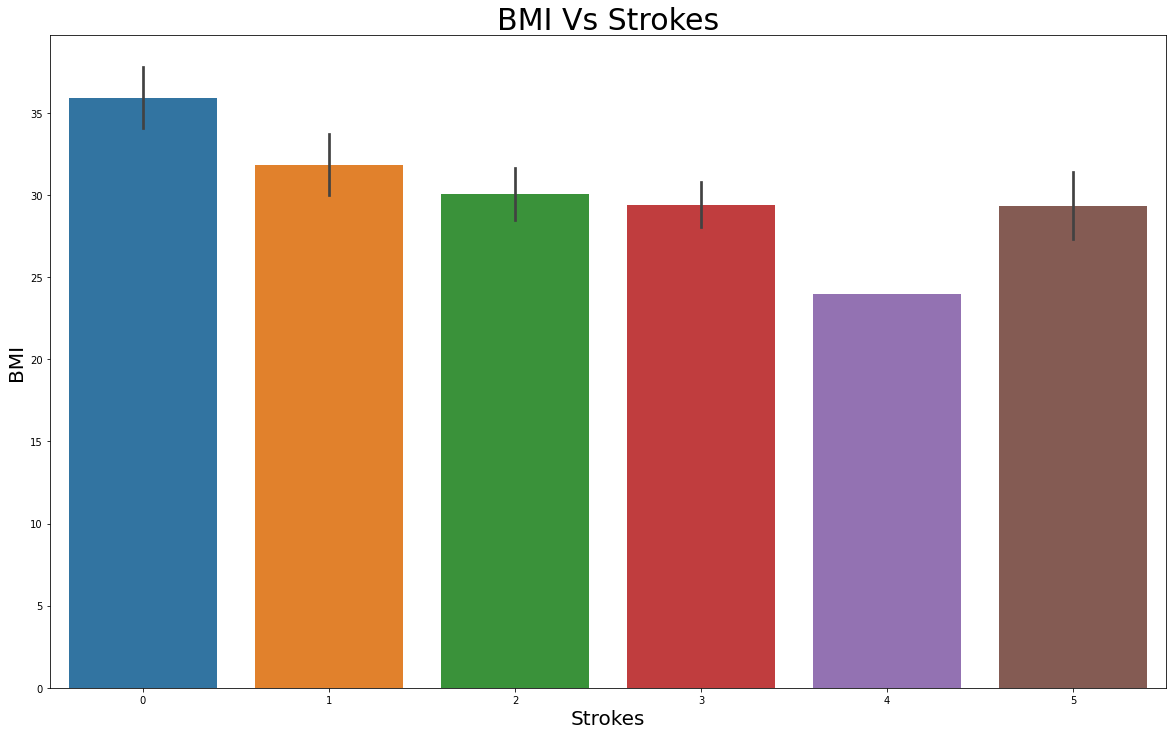

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
health_bmi = df.groupby('bmi')['stroke'].sum().sort_values(ascending=False)
sns.barplot(y=health_bmi.index, x=health_bmi)
plt.xlabel('Strokes', fontsize=20)
plt.ylabel('BMI', fontsize=20)
plt.title('BMI Vs Strokes', fontsize=30);

There are outliers between bmi and stroke

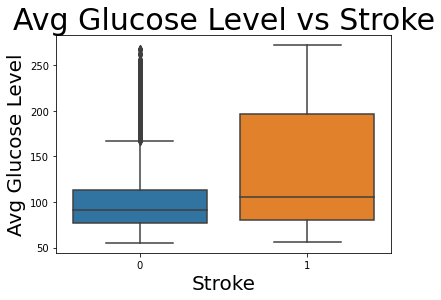

In [ ]:
sns.boxplot(data = df, x=df.stroke, y=df.avg_glucose_level)
plt.title('Avg Glucose Level vs Stroke', fontsize=30)
plt.xlabel('Stroke', fontsize=20)
plt.ylabel('Avg Glucose Level', fontsize=20);

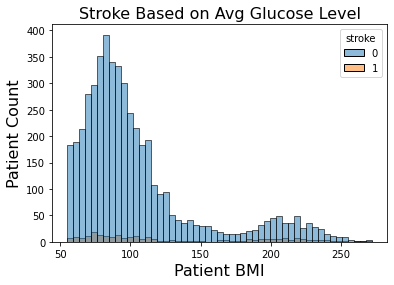

In [ ]:
sns.histplot(data=df, x='avg_glucose_level', hue='stroke')
plt.title('Stroke Based on Avg Glucose Level', fontsize=16)
plt.xlabel('Patient BMI', fontsize=16)
plt.ylabel('Patient Count', fontsize=16);

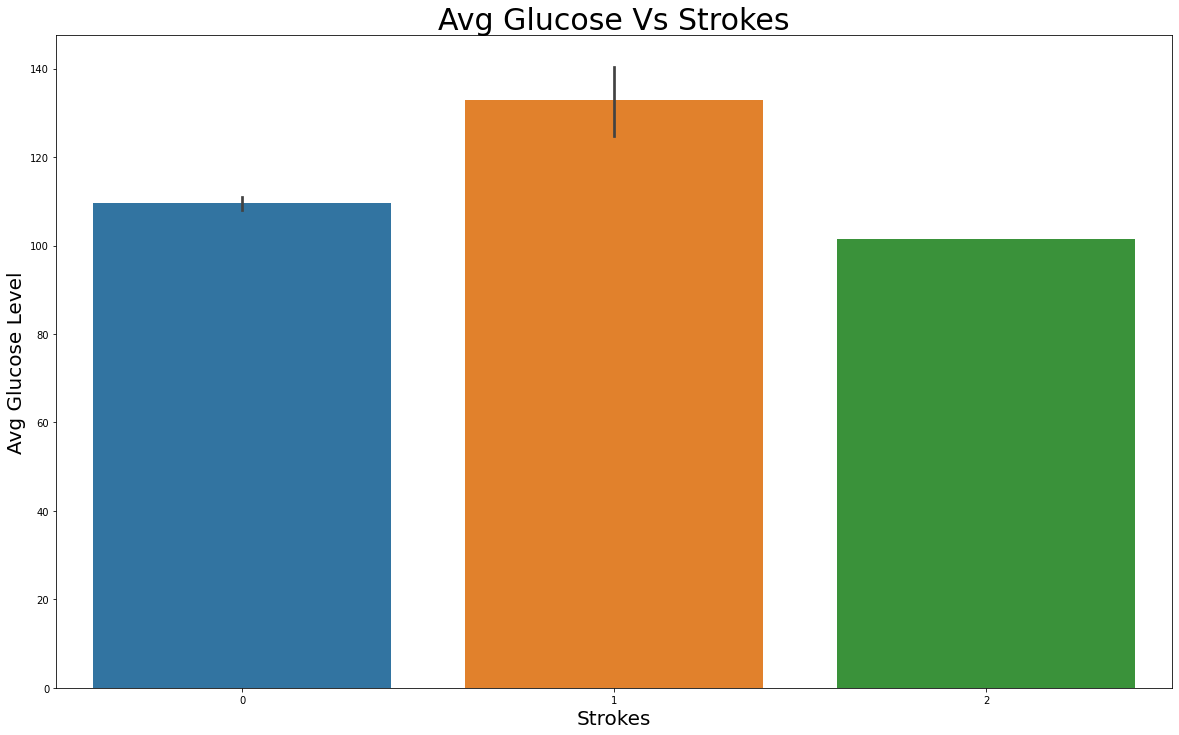

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
health_glucose = df.groupby('avg_glucose_level')['stroke'].sum().sort_values(ascending=False)
sns.barplot(y=health_glucose.index, x=health_glucose)
plt.xlabel('Strokes', fontsize=20)
plt.ylabel('Avg Glucose Level', fontsize=20)
plt.title('Avg Glucose Vs Strokes', fontsize=30);

There are a lot of outliers for those who do not have strokes and high means for those who do.

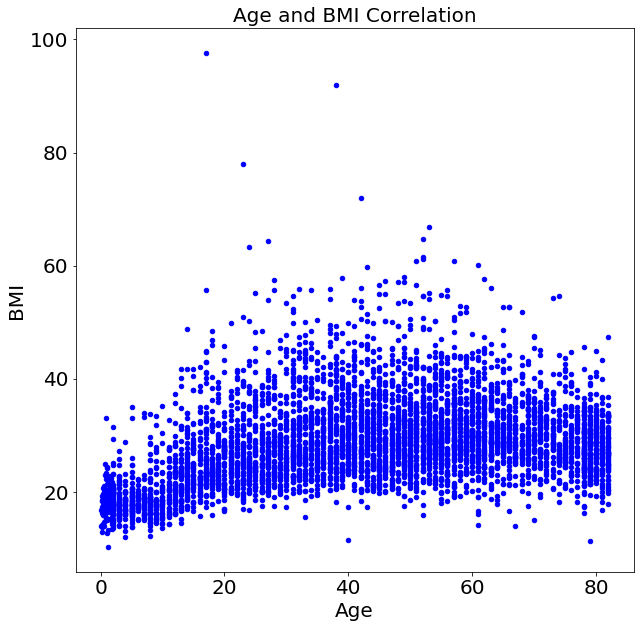

In [ ]:
df.plot.scatter(x='age', y='bmi', figsize=(10,10), color='b')
plt.title('Age and BMI Correlation', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('BMI', fontsize=20);

There is a slight positive correlation between age and BMI

##Preprocessing for Machine Learning

###Import necessary libraries

In [ ]:
#import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
#Identify the target(X) and features(y)
X = df.drop(columns = 'stroke')
y = df['stroke']

###Perform a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###Instantiate Column Selectors

In [ ]:
#Column Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

###Instantaite tranformers

In [ ]:
#Imputers for missing values
median_imputer = SimpleImputer(strategy='median')

#scaler
scaler = StandardScaler()

#OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

###Instantiate Pipelines

For numeric pipeline, impute missing values with the median value, then scale the data

For categorical pipeline, OneHotEncode the categorical data

In [ ]:
#numeric pipeline
num_pipe = make_pipeline(median_imputer, scaler)

###Instantiate Column Transformer

In [ ]:
#tuples for column transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (ohe, cat_selector)

#Column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)])

###Transform the data

In [ ]:
#fit the train data only
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)])

##Machine Learning Models

###Import Necessary Machine Learning Libraries

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

###Classification Report for Evaluating Models

In [ ]:
#Classification Report code

def evaluate_classification(model, X_test, y_test, cmap=None,
                            normalize='true', classes=None, figsize=(20,5),
                            label=[]):
  #get predictions
  test_preds = model.predict(X_test)

  #print classification report
  print(f'Classification Report for {label}')
  print(metrics.classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=3, figsize=figsize)

  #Confusion Matrix
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens',
                                        display_labels=classes,
                                        ax=ax[0])
  #Confusion Matrix with Percentages
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])

  #RC Curve
  curve = metrics.plot_roc_curve(model, X_test, y_test, ax=ax[2])
  curve.ax_.grid()
  curve.ax_.plot([0, 1], [0, 1], ls=':')

###KNN Classifier

In [ ]:
#instantiate the model
knn = KNeighborsClassifier()

#create a pipeline
knn_pipe = make_pipeline(preprocessor, knn)

#fit the pipeline
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Classification Report for baseline KNN training data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3662
           1       0.75      0.05      0.10       169

    accuracy                           0.96      3831
   macro avg       0.85      0.53      0.54      3831
weighted avg       0.95      0.96      0.94      3831



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


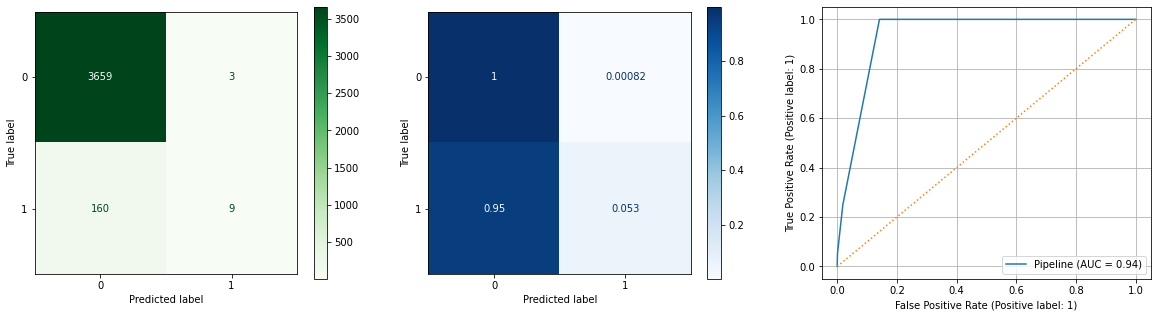

In [ ]:
#default knn for training data
evaluate_classification(knn_pipe, X_train, y_train, label='baseline KNN training data')

Classification Report for baseline KNN testing data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


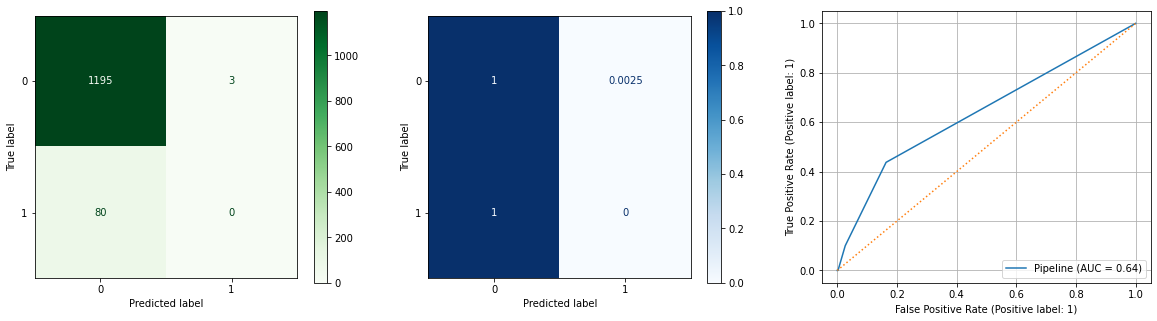

In [ ]:
#default knn for testing data
evaluate_classification(knn_pipe, X_test, y_test, label= 'baseline KNN testing data')

####Hypertune Model

In [ ]:
#obtain parameters
knn_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'columntransformer__onehotencoder__ca

In [ ]:
#create dictionary with parameters to test
knn_param = {'kneighborsclassifier__n_neighbors' : range(1,10),
            'kneighborsclassifier__p' : range(1,5),
            'kneighborsclassifier__leaf_size': range(10,100,10),
            'kneighborsclassifier__weights' : ['uniform', 'distance']}

In [ ]:
#Instantiate the Gridsearch with KNN pipeline
knn_gs = GridSearchCV(knn_pipe, knn_param)

knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(hand...
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': range(10, 100, 10),
                         'kneighborsclassifier__n_neighbors': range(1, 10),
                         'kneighborsclassifier__p': range(1, 5),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [ ]:
#Observe which hyperparameters have the best results
knn_gs.best_params_

{'kneighborsclassifier__leaf_size': 10,
 'kneighborsclassifier__n_neighbors': 4,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
#Observe which hyperparameters have best results
best_knn = knn_gs.best_estimator_
best_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283bc3f390>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283bc3fb10>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=4, p=1))])

Classification Report for hypertuned KNN training data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3662
           1       1.00      0.04      0.08       169

    accuracy                           0.96      3831
   macro avg       0.98      0.52      0.53      3831
weighted avg       0.96      0.96      0.94      3831



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


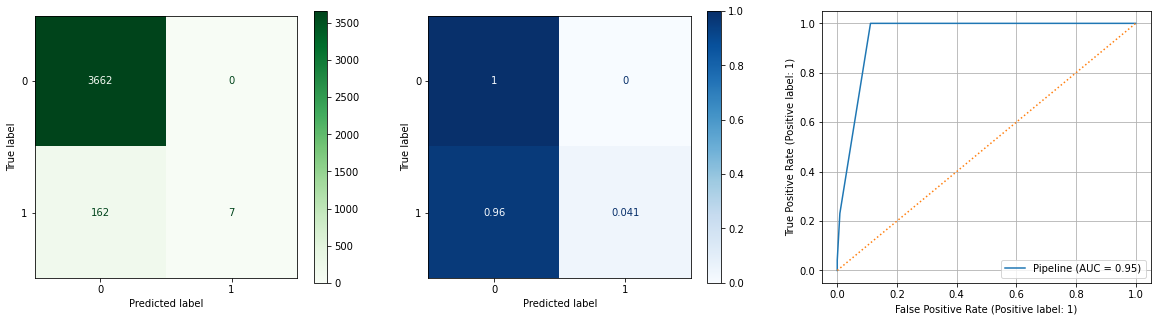

In [ ]:
#Evaluate the metrics of the tuned model for the train sets
evaluate_classification(best_knn, X_train, y_train, label= 'hypertuned KNN training data')

Classification Report for hypertuned KNN testing data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


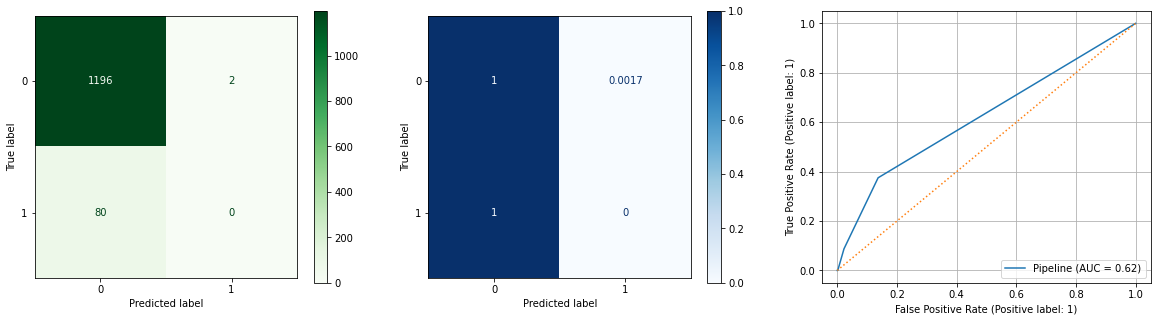

In [ ]:
#Evaluate the metrics of the tuned model for the test sets
evaluate_classification(best_knn, X_test, y_test, label= 'hypertuned KNN testing data')

###Random Forest Classifier

In [ ]:
#instantiate the model
rf = RandomForestClassifier(random_state=42)

#create a pipeline
rf_pipe = make_pipeline(preprocessor, rf)

#fit the pipeline
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

Classification Report for baseline RF training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3662
           1       1.00      1.00      1.00       169

    accuracy                           1.00      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       1.00      1.00      1.00      3831



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


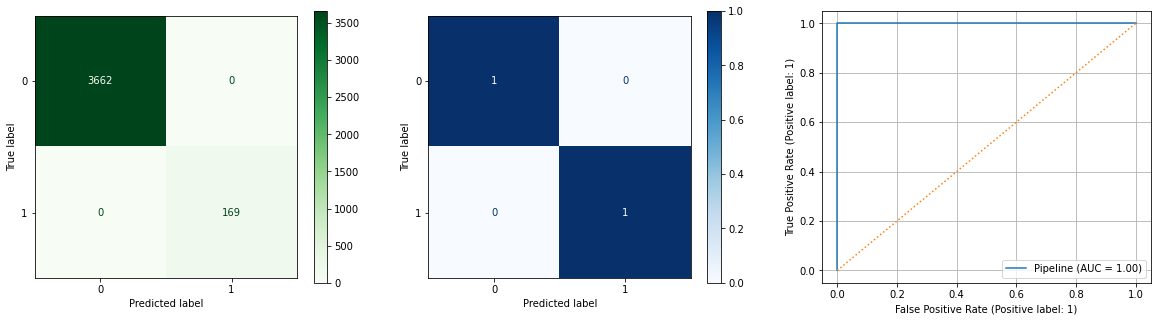

In [ ]:
#default baseline for training data
evaluate_classification(rf_pipe, X_train, y_train, label= 'baseline RF training data')

Classification Report for baseline RF testing data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


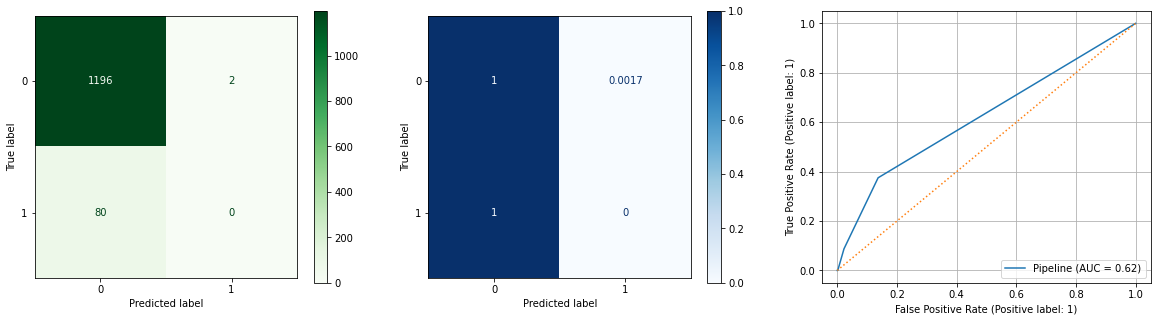

In [ ]:
#default baseline for testing data
evaluate_classification(best_knn, X_test, y_test, label= 'baseline RF testing data')

####Hypertune Model

In [ ]:
#obtain parameters
rf_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'columntransformer__onehotencoder__ca

In [ ]:
#Define hyperparameters to test
rf_params = {'randomforestclassifier__max_depth': range(1, 10),
             'randomforestclassifier__n_estimators': range(100, 500, 50),
             'randomforestclassifier__min_samples_split': [2, 4]}

In [ ]:
#Instantiate the gridsearch with the Random Forest Pipeline and fit on training data
rf_gs = GridSearchCV(rf_pipe, rf_params)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(hand...nown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': range(1, 10),
                         'randomforestclassifier__min_samples_split': [2, 4],
                         'randomforestclassifier__n_estimators': range(100, 500, 50)})

In [ ]:
#Observe which hyperparameters gave best results
rf_gs.best_params_

{'randomforestclassifier__max_depth': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 100}

In [ ]:
#Observe which hyperparameters have best results
best_rf = rf_gs.best_estimator_
best_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283e0db410>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283e0dbed0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=1, random_state=42))])

Classification Report for hypertuned RF training data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3662
           1       0.00      0.00      0.00       169

    accuracy                           0.96      3831
   macro avg       0.48      0.50      0.49      3831
weighted avg       0.91      0.96      0.93      3831



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

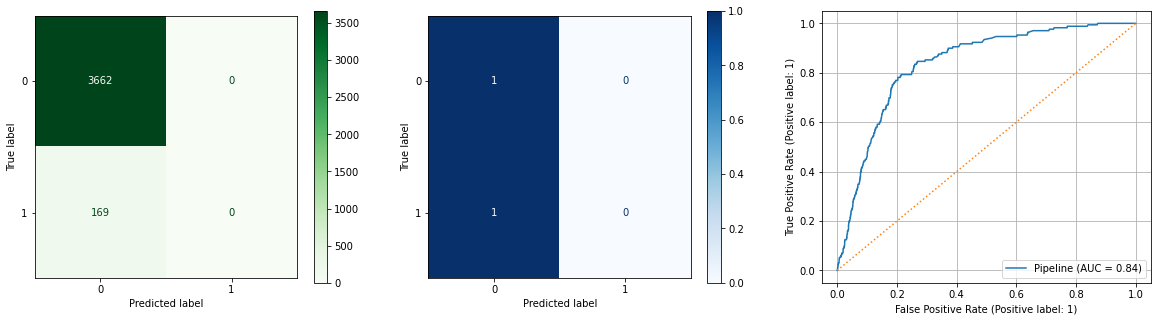

In [ ]:
#Evaluate the metrics of the tuned model for the train sets
evaluate_classification(best_rf, X_train, y_train, label= 'hypertuned RF training data')

Classification Report for hypertuned RF testing data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

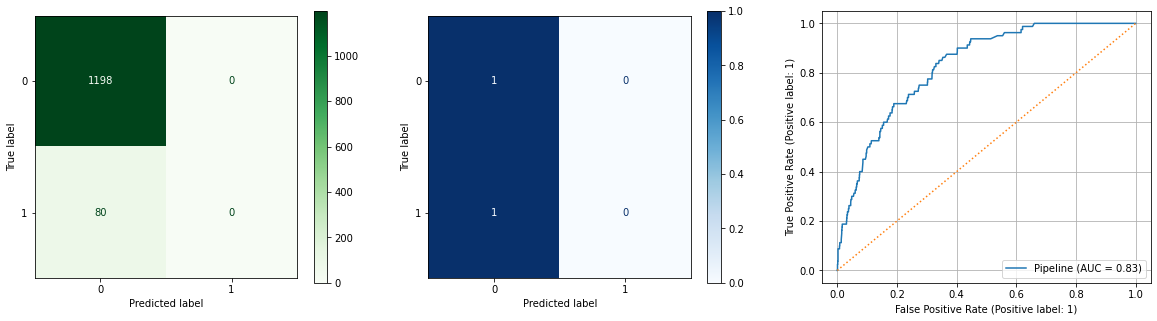

In [ ]:
#Evaluate the metrics of the tuned model for the test sets
evaluate_classification(best_rf, X_test, y_test, label= 'hypertuned RF testing data')

###XGBooster

In [ ]:
#instantiate the model
xgb = XGBClassifier()

#create a pipeline
xgb_pipe = make_pipeline(preprocessor, xgb)

#fit the pipeline
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)])),
                ('xgbclassifier', XGBClassifier())])

Classification Report for baseline XGB training data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3662
           1       1.00      0.02      0.03       169

    accuracy                           0.96      3831
   macro avg       0.98      0.51      0.51      3831
weighted avg       0.96      0.96      0.94      3831



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


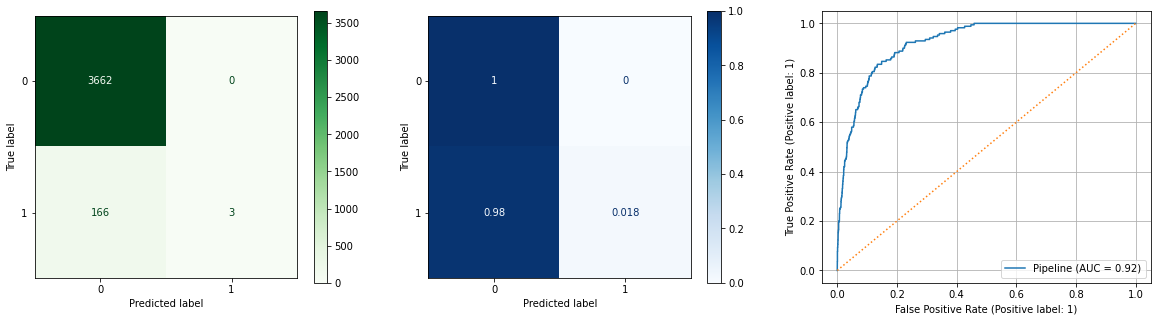

In [ ]:
#default baseline for training data
evaluate_classification(xgb_pipe, X_train, y_train, label= 'baseline XGB training data')

Classification Report for baseline XGB testing data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

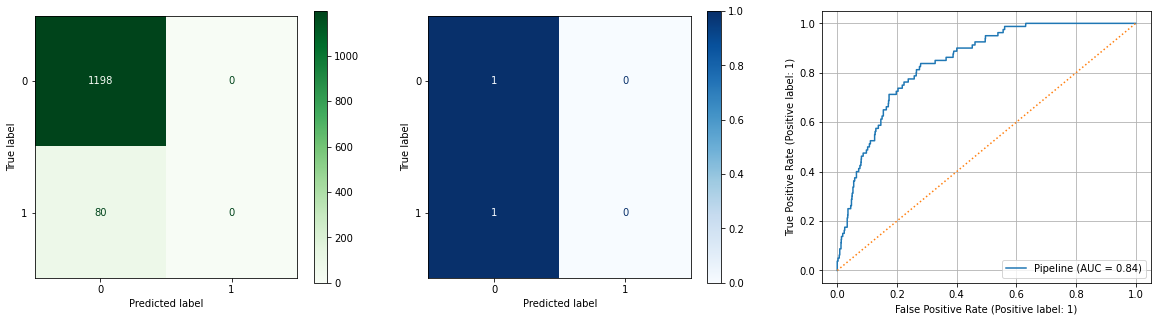

In [ ]:
#default baseline for testing data
evaluate_classification(xgb_pipe, X_test, y_test, label= 'baseline XGB testing data')

####Hypertune the Model

In [ ]:
#obtain parameters
xgb_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'columntransformer__onehotencoder__ca

In [ ]:
#Define hyperparameters to test
xgb_params = {'xgbclassifier__base_score': range(0,2),
              'xgbclassifier__max_depth': range(1,10,2),
              'xgbclassifier__n_estimators': range(100, 350, 50),
              'xgbclassifier__objective': ['reg:squarederror']}

In [ ]:
#Instantiate the gridsearch with the Random Forest Pipeline and fit on training data
xgb_gs = GridSearchCV(xgb_pipe, xgb_params)

xgb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d45d0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f283c2d4610>)])),
                                       ('xgbclassifier', XGBClassifier())]),
             param_grid={'xgbclassifier__base_score': range(0, 2),
                         'xgbclassifier__max_depth': range(1, 10, 2),
                         'xgbclassifier__n_estimators': range(100, 350, 50),
                         'xgbclassifier__objective': ['reg:squarederror']})

In [ ]:
#Observe which hyperparameters gave best results
xgb_gs.best_params_

{'xgbclassifier__base_score': 0,
 'xgbclassifier__max_depth': 1,
 'xgbclassifier__n_estimators': 100,
 'xgbclassifier__objective': 'reg:squarederror'}

In [ ]:
#Observe which hyperparameters have best results
best_xgb = xgb_gs.best_estimator_
best_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283cc6b710>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f283cc6b450>)])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0, max_depth=1,
                               objective='reg:squarederror'))])

Classification Report for hypertuned XGB training data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3662
           1       1.00      0.01      0.01       169

    accuracy                           0.96      3831
   macro avg       0.98      0.50      0.49      3831
weighted avg       0.96      0.96      0.93      3831



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


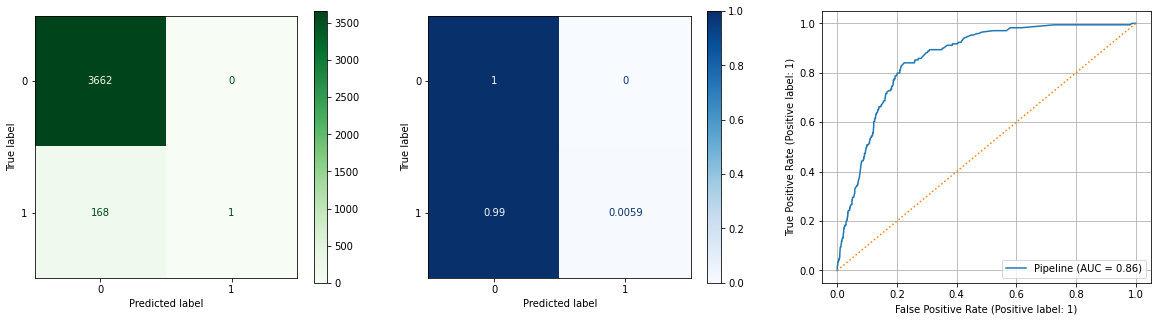

In [ ]:
#Evaluate the metrics of the tuned model for the train sets
evaluate_classification(best_xgb, X_train, y_train, label= 'hypertuned XGB training data')

Classification Report for hypertuned XGB testing data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

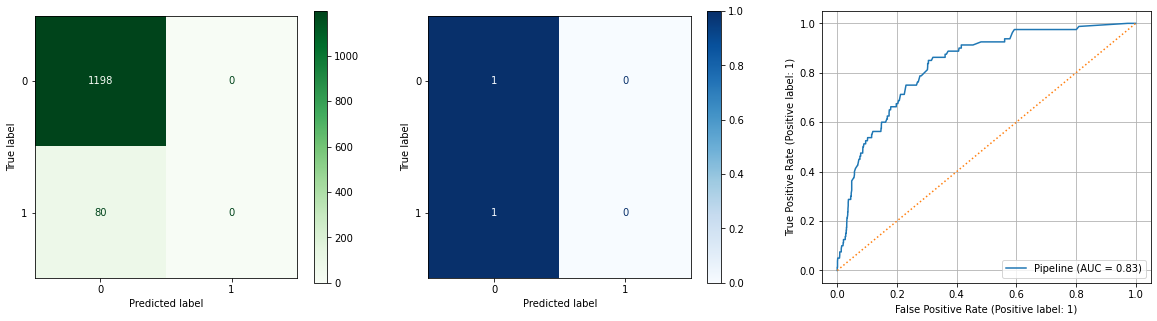

In [ ]:
evaluate_classification(best_xgb, X_test, y_test, label= 'hypertuned XGB testing data')

##Comparisons

| | KNN Classifier| Random Forest Classifier | XGBooster
-------------|---------------------------|----------|------|
Baseline - Training| 96%| 100%| 96%
Baseline - Testing| 94%|94%|96%
Hypertuned - Training| 96%| 96%|96%
Hypertuned - Testing| 94%|94%|94%

* XGBooster provides a slightly better accuracy score compared to KNN Classifier and Ranfom Forest Classifier.
* Random Forest Classifier was initially slightly overfit but, after hypertuning, better results were obtained.
* KNN Classifier remained unchanged after hypertunning.